In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import pickle
from flask import Flask, request, jsonify
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df

,TransactionID,Time,Amount,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1,121958,333.10,1.749242,0.285690,-0.230932,-0.238271,-0.864070,-0.592754,-0.284905,...,-0.496925,0.960871,0.474793,-0.931428,-2.305303,-0.022552,-0.586308,0.880667,-0.746409,0
1,2,146867,1145.13,0.794017,-1.066721,0.684843,-1.241042,-0.240662,1.369329,-0.567262,...,-1.246525,0.166603,-0.573194,-1.632434,1.168117,0.953462,-0.079642,-0.867343,0.833731,0
2,3,131932,2714.25,0.457537,-0.116630,-0.965233,1.458639,-1.216607,-0.079389,0.128481,...,1.139845,-0.391956,-0.399728,-1.055647,-0.672641,1.450519,-0.708105,-0.461151,0.097881,0
3,4,103694,2157.65,-1.193597,-0.723088,-0.611269,-0.181636,0.982033,0.509139,-0.592644,...,0.195042,-0.270249,-0.643047,1.517267,1.600411,-0.236680,0.229194,-1.394158,1.898222,1
4,5,119879,1664.09,0.935238,-0.401059,-1.167727,1.657142,1.717331,0.501561,0.254206,...,0.502350,1.377280,0.676223,0.331462,0.120488,-0.455019,0.040467,-0.921948,-0.151167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,150168,4819.11,2.453903,-1.976000,-0.412384,-0.453639,0.797209,1.565690,1.756971,...,0.877613,-0.949178,0.776634,-0.683265,0.354720,1.002685,-0.673942,0.045125,-0.221248,0
996,997,67728,1242.91,0.742750,-1.432939,-0.047110,-1.574297,-0.489845,0.077584,-0.610703,...,-0.358191,-0.095830,2.008641,-1.015611,-1.269107,-0.474106,-1.888115,1.590333,1.411024,0
997,998,165088,669.03,1.364799,0.011928,0.480050,-1.000602,0.314578,-1.085268,1.675540,...,-0.185561,-1.994319,0.419671,0.021585,-0.384717,0.234822,0.802816,-1.965229,0.141775,0
998,999,11246,2092.91,1.871748,1.027882,2.766140,-0.181637,0.739346,-1.197803,-1.270946,...,1.470703,-0.217952,1.261074,-0.545216,-0.128479,1.547180,-1.888438,-0.308286,0.025741,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   int64  
 1   Time           1000 non-null   int64  
 2   Amount         1000 non-null   float64
 3   V1             1000 non-null   float64
 4   V2             1000 non-null   float64
 5   V3             1000 non-null   float64
 6   V4             1000 non-null   float64
 7   V5             1000 non-null   float64
 8   V6             1000 non-null   float64
 9   V7             1000 non-null   float64
 10  V8             1000 non-null   float64
 11  V9             1000 non-null   float64
 12  V10            1000 non-null   float64
 13  V11            1000 non-null   float64
 14  V12            1000 non-null   float64
 15  V13            1000 non-null   float64
 16  V14            1000 non-null   float64
 17  V15            1000 non-null   float64
 18  V16      

In [5]:
df.describe()

,TransactionID,Time,Amount,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,86194.539000,2516.246150,0.042779,0.016610,0.017003,-0.017939,0.020351,0.030028,-0.018450,...,0.027302,0.047958,-0.008120,0.022875,0.007192,-0.011973,0.000304,-0.043296,-0.002706,0.04600
std,288.819436,50008.474586,1412.162638,1.007499,1.013585,0.986704,0.986880,0.989054,1.016557,1.016169,...,1.005212,0.995712,1.004086,0.986866,1.019033,1.009689,1.027838,1.055897,1.009515,0.20959
min,1.000000,235.000000,1.200000,-2.901524,-3.239438,-2.649100,-3.708797,-3.064457,-2.814715,-3.408967,...,-3.053153,-3.285666,-2.912238,-3.144962,-2.750909,-3.091996,-3.592747,-3.363726,-3.543319,0.00000
25%,250.750000,42052.250000,1279.625000,-0.653796,-0.653553,-0.629621,-0.686435,-0.656611,-0.669008,-0.690784,...,-0.692749,-0.614262,-0.697912,-0.646053,-0.697810,-0.718108,-0.653036,-0.781532,-0.665063,0.00000
50%,500.500000,89361.500000,2585.855000,0.064387,0.038267,-0.013499,0.024327,0.019860,0.026783,-0.037633,...,0.060659,0.061607,-0.026882,0.002945,0.053468,-0.022418,0.008117,-0.065906,-0.016370,0.00000
75%,750.250000,127614.750000,3722.382500,0.732982,0.697391,0.685498,0.651379,0.705500,0.717516,0.661614,...,0.720444,0.757627,0.666398,0.682313,0.716446,0.688171,0.654097,0.646823,0.695190,0.00000
max,1000.000000,172627.000000,4996.770000,3.254647,3.260491,3.657702,2.840886,3.599467,3.555617,3.093430,...,3.902799,3.588681,2.915063,3.938503,3.413526,3.809165,3.198980,3.542095,3.202001,1.00000


In [6]:
df.isna().sum()

,0
TransactionID,0
Time,0
Amount,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0


In [7]:
df.columns

Index(['TransactionID', 'Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [8]:
df['Class']

,Class
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


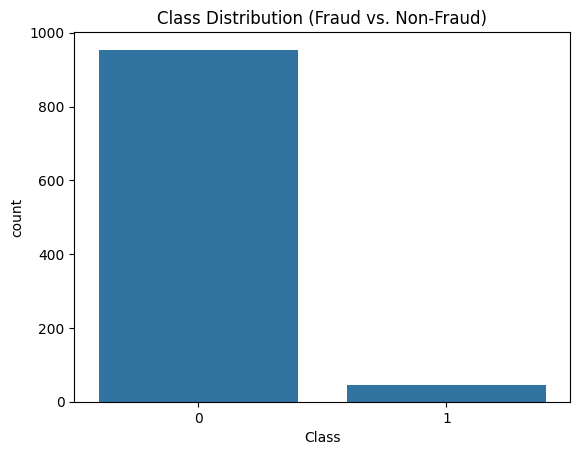

In [9]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs. Non-Fraud)")
plt.show()


In [10]:
X = df.drop(['TransactionID', 'Class'], axis=1)
y = df['Class']

In [11]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [12]:
smote

SMOTE(random_state=42)

In [13]:
X_smote, y_smote

(        Time       Amount        V1        V2        V3        V4        V5  \
 0     121958   333.100000  1.749242  0.285690 -0.230932 -0.238271 -0.864070   
 1     146867  1145.130000  0.794017 -1.066721  0.684843 -1.241042 -0.240662   
 2     131932  2714.250000  0.457537 -0.116630 -0.965233  1.458639 -1.216607   
 3     103694  2157.650000 -1.193597 -0.723088 -0.611269 -0.181636  0.982033   
 4     119879  1664.090000  0.935238 -0.401059 -1.167727  1.657142  1.717331   
 ...      ...          ...       ...       ...       ...       ...       ...   
 1903   50416  2345.865731 -0.564560 -0.722597  1.265681  0.251650  0.620682   
 1904  151589   759.876258  1.409156  1.582359 -0.222826 -1.252832 -0.399190   
 1905  145319  2665.856771  0.865706 -0.273362 -0.207984 -1.158122 -0.504673   
 1906    7218  4119.035925 -1.439529 -0.100047 -0.334587 -1.166446 -1.163839   
 1907  103284  2253.972652 -1.166959 -0.735491 -0.550282 -0.248219  0.977262   
 
             V6        V7        V8  .

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [15]:
X_train, X_test, y_train, y_test

(        Time       Amount        V1        V2        V3        V4        V5  \
 141   109225  4026.580000 -0.255881 -0.899111 -1.062777 -2.774220  1.553959   
 1009  159600  3827.084309  0.255517  0.855666 -0.323601  1.341566  0.170272   
 1102  136240  1907.792499  0.191456 -0.177400 -0.296422 -1.479171 -0.978742   
 1782  103024   268.100102  0.845101  0.782471 -0.191151  0.020770  0.201022   
 339    18070  4945.920000  0.746560  0.266912  0.168929  0.570695  0.145244   
 ...      ...          ...       ...       ...       ...       ...       ...   
 1130   44840   928.058319  0.126499 -1.423567  0.888729  1.034095  0.108664   
 1294  103319  1931.045949 -0.931834 -0.485831 -0.651695 -0.154004  0.882953   
 860   134668   349.670000 -0.315959 -1.538756 -0.556152  0.123904 -0.154169   
 1459  129817  3040.886194  0.576363  1.540038  0.597116 -0.069183  0.752375   
 1126  157731  2811.721084 -0.730741  0.032656 -0.930667  0.057160  0.602106   
 
             V6        V7        V8  .

In [16]:
model = RandomForestClassifier(random_state=42)


In [17]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)


In [19]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.98      0.99      0.99       192

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382



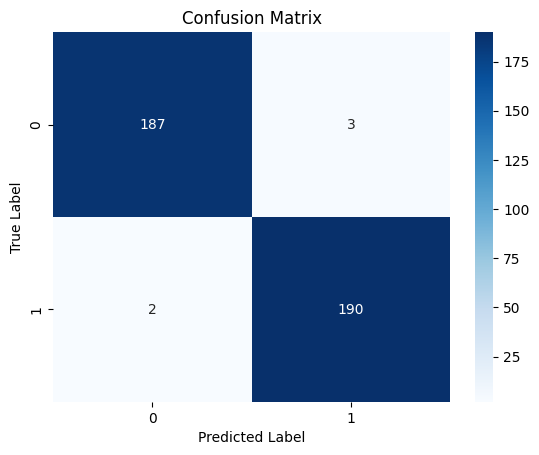

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [22]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_score))


ROC-AUC Score: 1.00


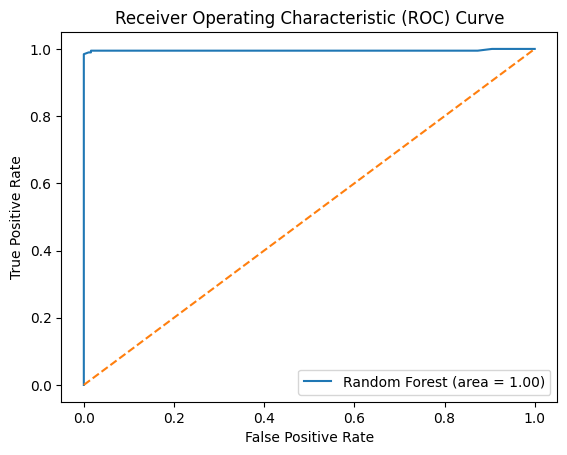

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Random Forest (area = {:.2f})".format(roc_score))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [26]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
joblib.dump(model, 'credit_fraud_model.pkl')


['credit_fraud_model.pkl']

In [28]:
import joblib
import pandas as pd

model = joblib.load('credit_fraud_model.pkl')

input_data = {
    'Time': [10000],
    'Amount': [50.0],
    'V1': [-1.3598],
    'V2': [2.5364],
    'V3': [-1.1743],
    'V4': [0.1534],
    'V5': [-0.8701],
    'V6': [-0.3423],
    'V7': [0.2541],
    'V8': [-0.6478],
    'V9': [-0.6261],
    'V10': [1.2345],
    'V11': [-0.3122],
    'V12': [-0.4723],
    'V13': [0.0915],
    'V14': [0.5756],
    'V15': [-0.2364],
    'V16': [-0.1204],
    'V17': [-0.2143],
    'V18': [0.0913],
    'V19': [0.1524],
    'V20': [-0.3214],
    'V21': [0.3345],
    'V22': [0.2234],
    'V23': [-0.2945],
    'V24': [0.1345],
    'V25': [0.1955],
    'V26': [-0.5643],
    'V27': [0.2214],
    'V28': [0.4324]
}

input_data_df = pd.DataFrame(input_data)
prediction = model.predict(input_data_df)

print("Prediction for the transaction (0: Not Fraud, 1: Fraud):", prediction[0])


Prediction for the transaction (0: Not Fraud, 1: Fraud): 0


In [29]:
prediction

array([0])